<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Module 3: Example of model ensembles

In this notebook, we will use the `VotingClassifier` algorithm implemented in `scikit-learn` to create a model ensemble that improves the results of 3 different classifiers independently, and we will use the ensemble to classify the instances in the Iris flower dataset.


Let's import the required classes:

In [1]:
# Import packages
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Now, we load the data:

In [2]:
# Import data
iris = datasets.load_iris()
x = iris.data
y = iris.target

And split in train and test:

In [3]:
# Split train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

It's normally a good practice to check that the data you have is what you expected. Let's see the shape of our data:

In [4]:
print('xtrain shape: ', xtrain.shape)
print('ytrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)
print('ytest shape: ', xtest.shape)

xtrain shape:  (100, 4)
ytrain shape:  (100, 4)
xtest shape:  (50, 4)
ytest shape:  (50, 4)


We will now create the classifier. In this notebook, we will use the `VotingClassifier` wrapper to combine 3 independent classifiers: `LogisticRegression`, `DecisionTreeClassifier` and `GaussianNB`.

Let's create the 3 independent classifiers and combine them in an ensemble. We will use the default parameters for all of them, except for `LogisticRegression`, where we will increase the `max_iter` attribute to ensure convergence.

In [5]:
clf1 = Perceptron(random_state=1)
clf2 = Perceptron(random_state=2)
clf3 = Perceptron(random_state=3)

As we saw in theory, there are two approaches for majority voting: hard and soft voting. We will run the examples with both of them. In addition, we will check how each classifier behaves independently.

Let's check the models independently:

In [6]:
print('5-fold cross validation:\n')

labels = ['Perceptron'] * 3

for clf, label in zip([clf1, clf2, clf3], labels):

    scores = model_selection.cross_val_score(clf, xtrain, ytrain, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.67 (+/- 0.13) [Perceptron]
Accuracy: 0.75 (+/- 0.08) [Perceptron]
Accuracy: 0.69 (+/- 0.14) [Perceptron]


Let's see with the ensemble of the three previous classifier and hard-voting:

In [7]:
model_ensemble = VotingClassifier(estimators=[
                                              ('1', clf1), 
                                              ('2', clf2), 
                                              ('3', clf3)
                                              ], voting='hard')

label = 'Model ensemble'
scores = model_selection.cross_val_score(model_ensemble, xtrain, ytrain, cv=5, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.77 (+/- 0.08) [Model ensemble]


We could try doing the same with a soft voting. For that, we need a classifier that outputs probabilities as well as the categorical labels.

We will use Naive Bayes in this example. Let's see what happens if we use the probabilities instead of the absolute class.

In [8]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)
clf2 = MLPClassifier(hidden_layer_sizes=2, random_state=1, max_iter=1000)
clf3 = MLPClassifier(hidden_layer_sizes=2, random_state=10, max_iter=1000)

In [9]:
model_ensemble = VotingClassifier(estimators=[
                                              ('1', clf1), 
                                              ('2', clf2), 
                                              ('3', clf3)
                                              ], voting='soft',
                                              weights=[2, 1, 10])

labels = ['Perceptron'] * 3 + ['Model ensemble']
for clf, label in zip([clf1, clf2, clf3, model_ensemble], labels):

    scores = model_selection.cross_val_score(clf, xtrain, ytrain, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.66 (+/- 0.02) [Perceptron]


/Users/robert/22.418/.conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/robert/22.418/.conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/robert/22.418/.conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/robert/22.418/.conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rober

Accuracy: 0.57 (+/- 0.11) [Perceptron]


/Users/robert/22.418/.conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/robert/22.418/.conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/robert/22.418/.conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.77 (+/- 0.04) [Perceptron]


/Users/robert/22.418/.conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/robert/22.418/.conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/robert/22.418/.conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/robert/22.418/.conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rober

Accuracy: 0.87 (+/- 0.07) [Model ensemble]


/Users/robert/22.418/.conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/robert/22.418/.conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/robert/22.418/.conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


The warnings we get are to advise us that sciki-learn thinks that we did not reach convergence. In this example, the iterations are chosen intentionally to achieve the desired effect, but you should always pay attention to these warnings and think if you are correctly executing your model.

As you can note, by combining the three models we are able to increase the accuracy of the model by 10% up to 87%. You can try different `weights` values and check how the results change.

And once we trained the ensemble, let's predict the labels for the test set:

In [10]:
# Predict Output 
model_ensemble.fit(xtrain, ytrain)
preds = model_ensemble.predict(xtest)

/Users/robert/22.418/.conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/robert/22.418/.conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Let's see the result. We'll compute the confusion matrix, which contains information about true positives/negatives and false positives/negatives

Text(110.44999999999997, 0.5, 'Predicted')

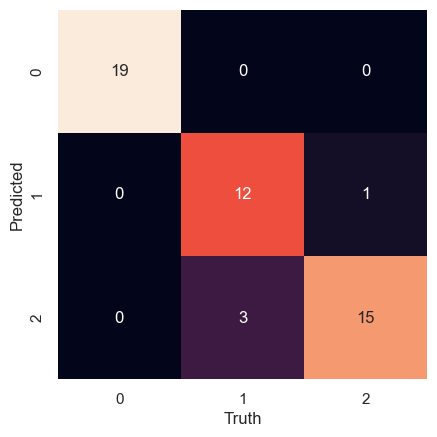

In [11]:
# Plot Confusion Matrix
mat = confusion_matrix(preds, ytest)
names = np.unique(preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')